In [6]:
import pickle as pkl
from utils import *

In [4]:
F = pkl.load(open("stats/base1/stats.pkl", "rb"))

In [23]:
def format_stats(stats_dict, length=50):
    train_info = {"loss": [],
                  "acc": []}
    
    valid_info = {"loss": [stats_dict["valid"]['-1']["loss"]],
                  "acc": [stats_dict["valid"]['-1']["acc"]]}
    
    best_epoch = stats_dict["best_epoch"] - 1

    
    for epoch in range(min(len(stats_dict["train"]), length)):
        train_info["loss"].append(stats_dict["train"][epoch]["loss"])
        valid_info["loss"].append(stats_dict["valid"][str(epoch)]["loss"])
        train_info["acc"].append(stats_dict["train"][epoch]["acc"])
        valid_info["acc"].append(stats_dict["valid"][str(epoch)]["acc"])


    return {"train": train_info, "valid": valid_info}

In [41]:
  def plot_loss(train_losses, valid_losses, arch="base"):
    fig, axs = plt.subplots(1, 1, figsize=(8,6))
    
    # Valid dataset has -1 epoch b/c we wanted to see stats before training
    X_valid = np.arange(-1, len(valid_losses) - 1)
    X_train = np.arange(len(train_losses))
    train_losses = np.array(train_losses)
    valid_losses = np.array(valid_losses)
        
    axs.set_title("Loss over Epochs ({0})".format(arch))
    axs.set_xlabel("Epoch")
    axs.set_ylabel("Loss")
    
    axs.plot(X_train, train_losses, label="Train", color=colors[0])
    axs.plot(X_valid, valid_losses, label="Valid", color=colors[1])
    
    axs.legend(loc='best', fontsize='x-large')
    axs.set_ylim([0, 1.1*max(np.max(train_losses), np.max(valid_losses))])
    
    path_name = os.path.join(arch, "loss")
    # plt.savefig(path_name)
    plt.show()
    
def plot_acc(train_losses, valid_losses, arch="base"):
    fig, axs = plt.subplots(1, 1, figsize=(8,6))
    
    # Valid dataset has -1 epoch b/c we wanted to see stats before training
    X_valid = np.arange(-1, len(valid_losses) - 1)
    X_train = np.arange(len(train_losses))
    train_losses = np.array(train_losses)
    valid_losses = np.array(valid_losses)
        
    axs.set_title("Acc over Epochs ({0})".format(arch))
    axs.set_xlabel("Epoch")
    axs.set_ylabel("Acc")
    
    axs.plot(X_train, train_losses, label="Train", color=colors[0])
    axs.plot(X_valid, valid_losses, label="Valid", color=colors[1])
    
    axs.legend(loc='best', fontsize='x-large')
    axs.set_ylim([0, 1.1*max(np.max(train_losses), np.max(valid_losses))])
    
    path_name = os.path.join(arch, "loss")
    # plt.savefig(path_name)
    plt.show()

In [44]:
def print_stats(arch):
    with open("stats/{0}/stats.pkl".format(arch), "rb") as f:
        stats_dict = pkl.load(f)
        
    stats_dict = json.loads(json.dumps(stats_dict), object_hook=json_fix_keys)
    formatted_stats_dict = format_stats(stats_dict)
    plot_loss(formatted_stats_dict["train"]["loss"], formatted_stats_dict["valid"]["loss"], arch)
    plot_acc(formatted_stats_dict["train"]["acc"], formatted_stats_dict["valid"]["acc"], arch)

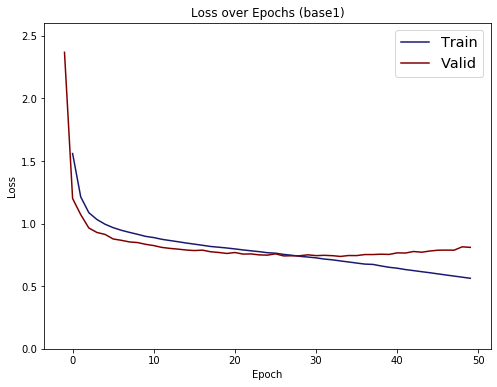

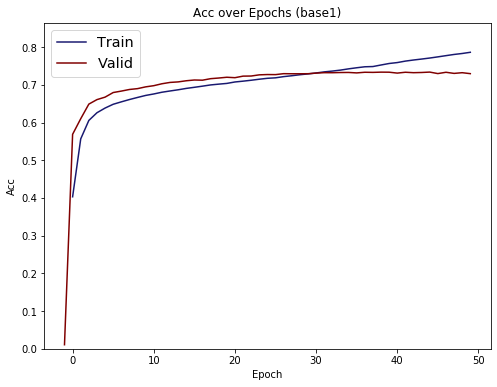

In [45]:
print_stats("base1")